# Continuous A/B Test

Prior Distribution:
- A Beta prior with parameters \(\alpha_{\text{prior}} = 1\) and \(\beta_{\text{prior}} = 1\), representing a uniform distribution (non-informative prior).

Posterior Distribution:
- Posterior parameters for the Beta distribution are calculated as follows:

$$
\alpha_{\text{post}} = \alpha_{\text{prior}} + \text{successes}
$$

$$
\beta_{\text{post}} = \beta_{\text{prior}} + (\text{trials} - \text{successes})
$$

Bayes Factor:
- The Bayes Factor is calculated to quantify the evidence in favor of the control group having a better conversion rate than the treatment group:

$$
\text{BF} = \frac{P(\text{control\_samples} > \text{treatment\_samples})}{P(\text{control\_samples} \leq \text{treatment\_samples})}
$$

In [14]:
# Summary statistics
n_control = 5000
mean_control = 5
var_control = 1

n_treatment = 6000
mean_treatment = 7
var_treatment = 2

95% Credible Intervals for Means:
Control Group: [4.97, 5.03]
Treatment Group: [6.97, 7.02]

Mean Values:
Control Group: 5.00
Treatment Group: 7.00

The credible intervals do not overlap, indicating a significant difference between the groups.
Bayes Factor (Treatment better than Control): 0.00
Percentage Uplift: 40.01%


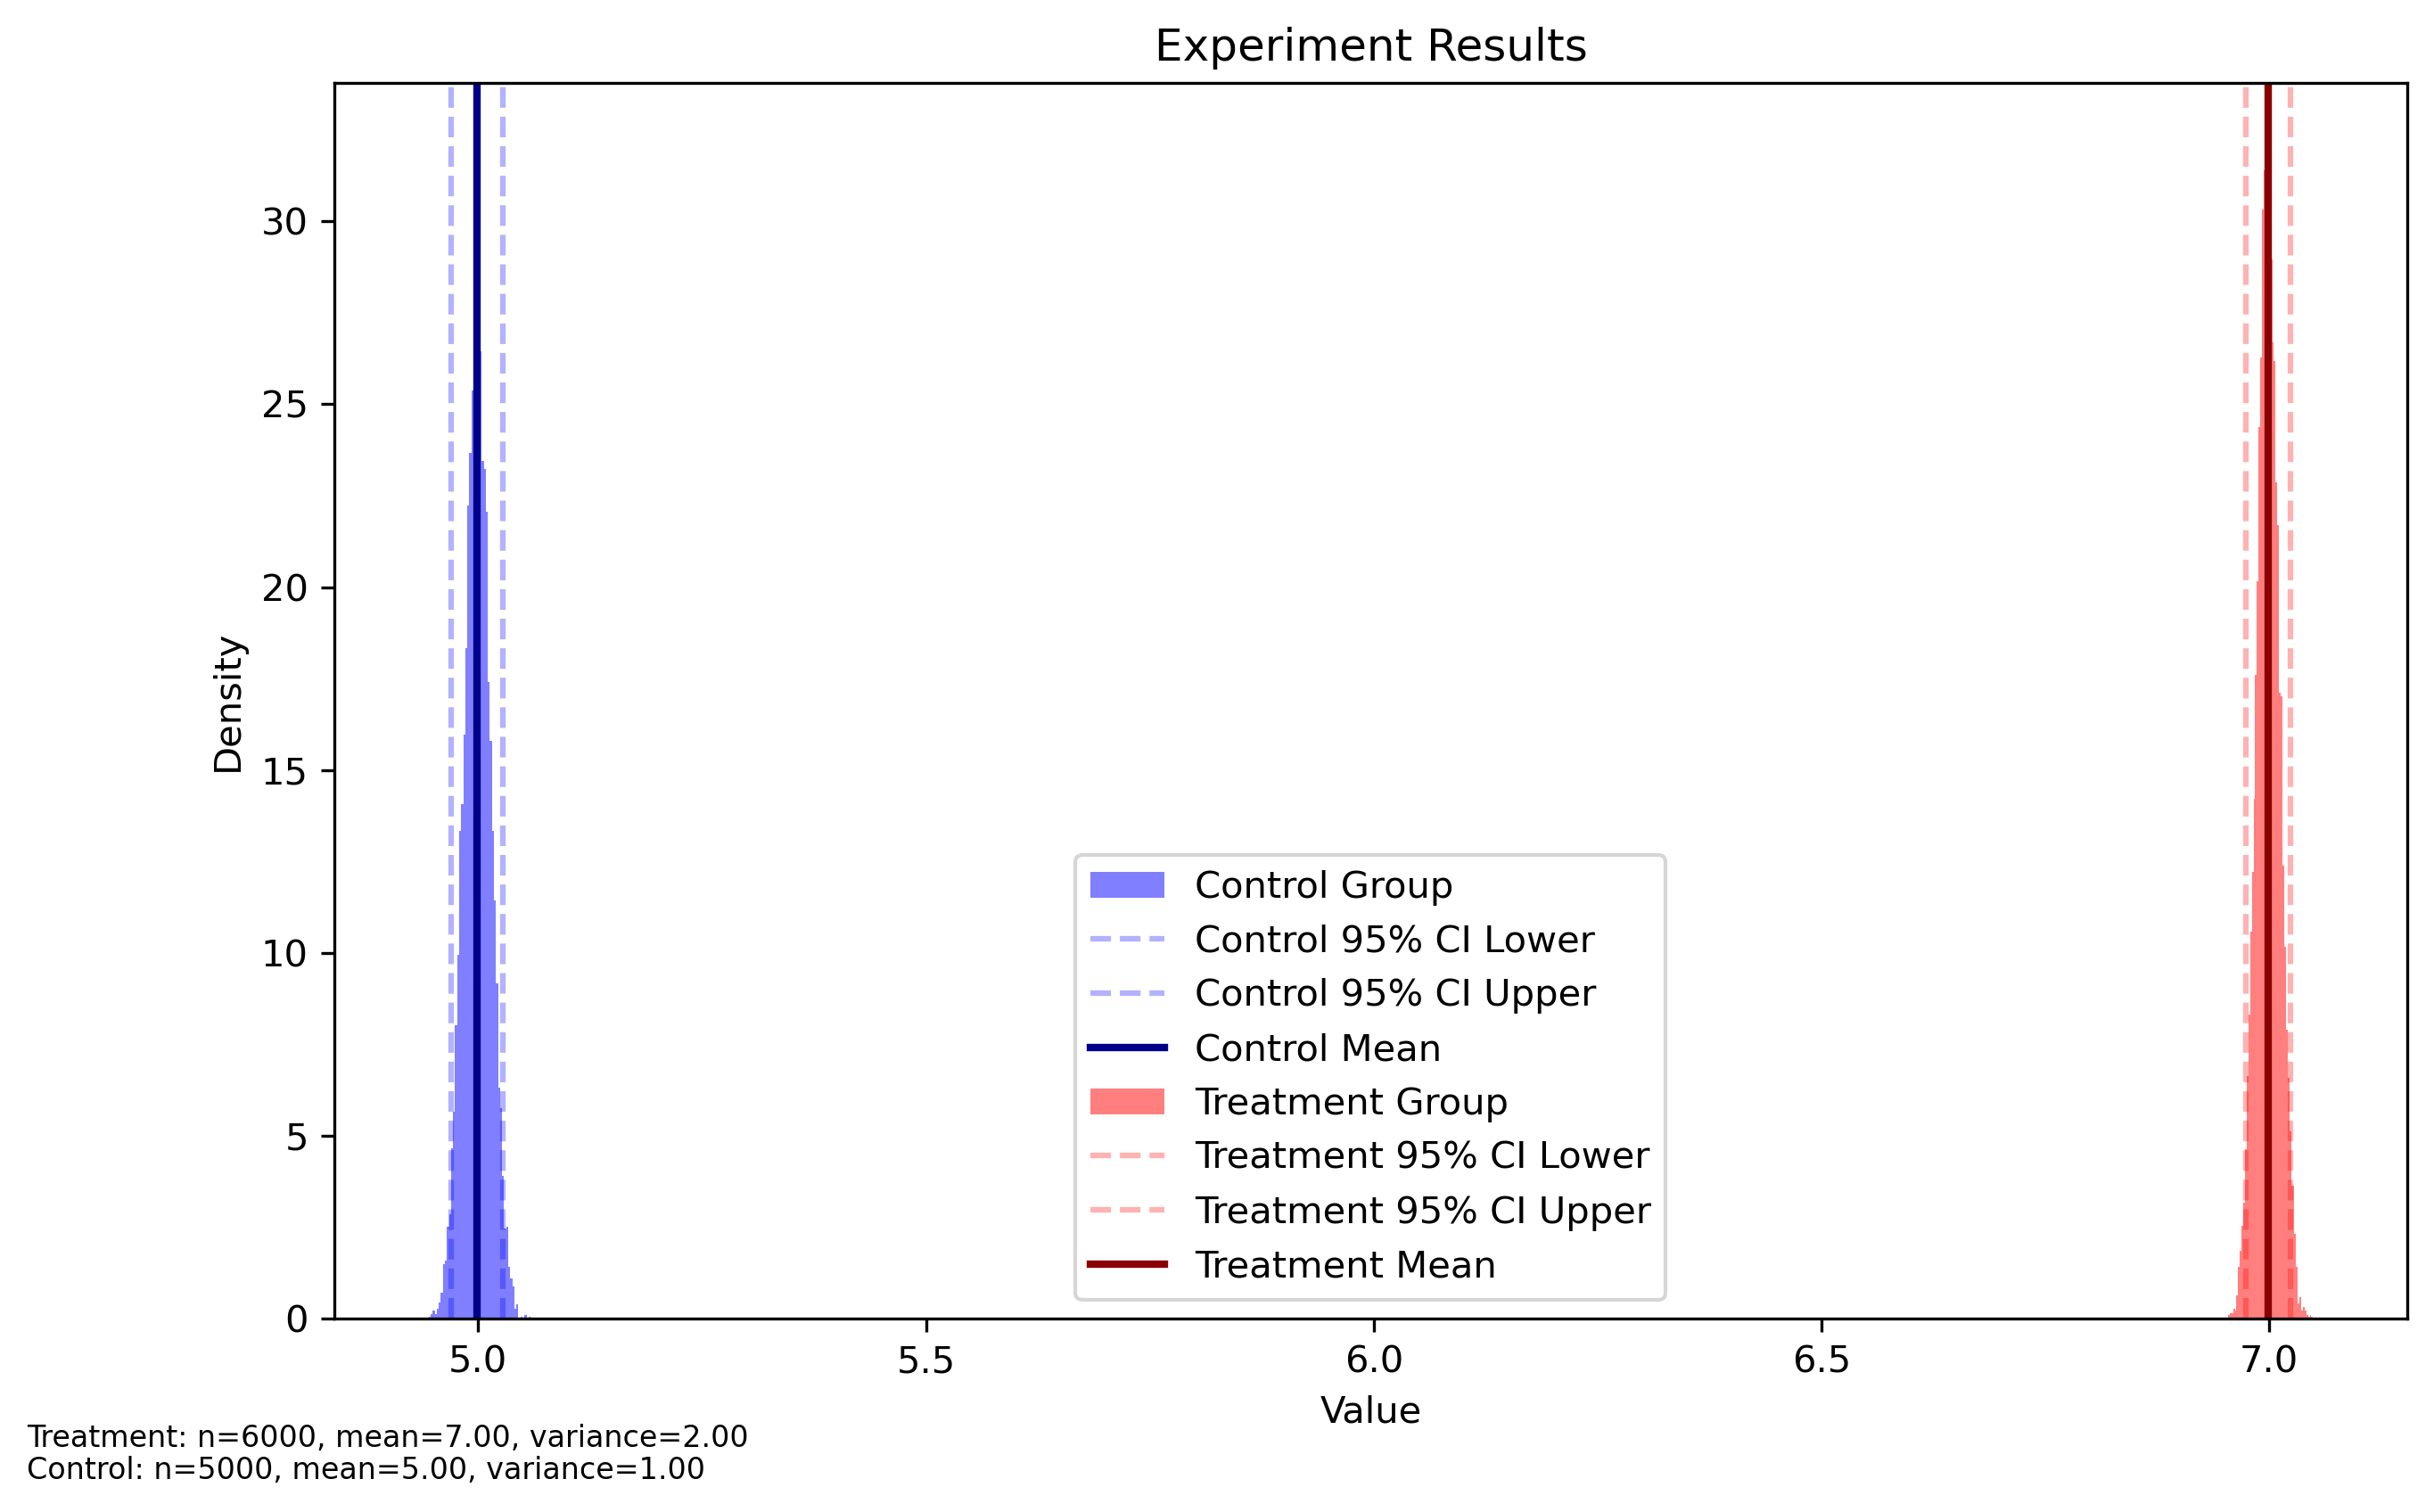

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Prior parameters (example values, adjust as needed)
mu_prior = 0
tau_prior = 1  # Precision (1/variance) of the prior distribution
alpha_prior = 1
beta_prior = 1

# Posterior parameters for control group
mu_post_control = (tau_prior * mu_prior + n_control * mean_control) / (tau_prior + n_control)
tau_post_control = tau_prior + n_control
alpha_post_control = alpha_prior + n_control / 2
beta_post_control = beta_prior + 0.5 * (np.sum((control_data - mean_control)**2) + tau_prior * n_control * (mean_control - mu_prior)**2 / (tau_prior + n_control))

# Posterior parameters for treatment group
mu_post_treatment = (tau_prior * mu_prior + n_treatment * mean_treatment) / (tau_prior + n_treatment)
tau_post_treatment = tau_prior + n_treatment
alpha_post_treatment = alpha_prior + n_treatment / 2
beta_post_treatment = beta_prior + 0.5 * (np.sum((treatment_data - mean_treatment)**2) + tau_prior * n_treatment * (mean_treatment - mu_prior)**2 / (tau_prior + n_treatment))

# Number of samples
num_samples = 10000

# Sample from the posterior distributions
control_variances = 1 / np.random.gamma(alpha_post_control, 1 / beta_post_control, num_samples)
control_samples = np.random.normal(mu_post_control, np.sqrt(control_variances / tau_post_control), num_samples)

treatment_variances = 1 / np.random.gamma(alpha_post_treatment, 1 / beta_post_treatment, num_samples)
treatment_samples = np.random.normal(mu_post_treatment, np.sqrt(treatment_variances / tau_post_treatment), num_samples)

# Calculate means and 95% credible intervals
control_mean = np.mean(control_samples)
treatment_mean = np.mean(treatment_samples)
control_credible_intervals = np.percentile(control_samples, [2.5, 97.5])
treatment_credible_intervals = np.percentile(treatment_samples, [2.5, 97.5])

# Output the credible intervals and means
print("95% Credible Intervals for Means:")
print("Control Group: [{:.2f}, {:.2f}]".format(control_credible_intervals[0], control_credible_intervals[1]))
print("Treatment Group: [{:.2f}, {:.2f}]".format(treatment_credible_intervals[0], treatment_credible_intervals[1]))

print()

print("Mean Values:")
print("Control Group: {:.2f}".format(control_mean))
print("Treatment Group: {:.2f}".format(treatment_mean))

print()

# Check if credible intervals overlap
control_lower, control_upper = control_credible_intervals
treatment_lower, treatment_upper = treatment_credible_intervals

if control_upper < treatment_lower or treatment_upper < control_lower:
    print("The credible intervals do not overlap, indicating a significant difference between the groups.")
else:
    print("The credible intervals overlap, indicating no significant difference between the groups.")

# Calculate Bayes Factor
diff_samples = treatment_samples - control_samples
mean_diff = np.mean(diff_samples)
std_diff = np.std(diff_samples)
z_score = mean_diff / std_diff

# Using a normal approximation to calculate the Bayes factor
bayes_factor = np.exp(-0.5 * z_score**2)

print("Bayes Factor (Treatment better than Control): {:.2f}".format(bayes_factor))

# Calculate percentage uplift
uplift = (treatment_mean / control_mean - 1) * 100
print("Percentage Uplift: {:.2f}%".format(uplift))

# Plot the distributions
plt.figure(figsize=(10, 6), dpi=300)

# Plot control group distribution
plt.hist(control_samples, bins=50, alpha=0.5, label='Control Group', color='blue', density=True)
plt.axvline(x=control_credible_intervals[0], color='blue', linestyle='--', alpha=0.3, label='Control 95% CI Lower')
plt.axvline(x=control_credible_intervals[1], color='blue', linestyle='--', alpha=0.3, label='Control 95% CI Upper')
plt.axvline(x=control_mean, color='darkblue', linestyle='-', linewidth=2, label='Control Mean')

# Plot treatment group distribution
plt.hist(treatment_samples, bins=50, alpha=0.5, label='Treatment Group', color='red', density=True)
plt.axvline(x=treatment_credible_intervals[0], color='red', linestyle='--', alpha=0.3, label='Treatment 95% CI Lower')
plt.axvline(x=treatment_credible_intervals[1], color='red', linestyle='--', alpha=0.3, label='Treatment 95% CI Upper')
plt.axvline(x=treatment_mean, color='darkred', linestyle='-', linewidth=2, label='Treatment Mean')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Experiment Results')
plt.legend()

# Add text annotations for sample sizes and variances
control_text = f'Control: n={n_control}, mean={mean_control:.2f}, variance={var_control:.2f}'
treatment_text = f'Treatment: n={n_treatment}, mean={mean_treatment:.2f}, variance={var_treatment:.2f}'

plt.figtext(0.01, 0.01, control_text, ha='left', fontsize=8)
plt.figtext(0.01, 0.03, treatment_text, ha='left', fontsize=8)

# Show the plot
plt.show()